# Part 1

In [33]:
!pip install openml


In [34]:
import openml
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset by ID
dataset = openml.datasets.get_dataset(1492)

# Get the data as a pandas DataFrame and the target column name
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
data = pd.concat([X, y], axis=1)

# Display the first few rows of the dataset
print(data.head())

# Number of features is the number of columns
num_features = X.shape[1]
print(f"The number of features is {num_features}")

# Number of instances is the number of rows
num_instances = data.shape[0]
print(f"The number of instances is {num_instances}")

# number of classes is the counter of distinct elements in y
print(f"The number of classes is {len(Counter(y))}")

# Number of numerical features are the one where you only select the number
num_numerical_features = X.select_dtypes(include=["number"]).shape[1]
print(f"Number of numerical features: {num_numerical_features}")


# Number of numerical features are the one where you only select the object or category
num_categorical_features = X.select_dtypes(include=["object", "category"]).shape[1]
print(f"Number of categorical features: {num_categorical_features}")

# To asses the balance we check if the classes have similar number of instances
class_counts = y.value_counts()
print(class_counts)





         V1        V2        V3        V4        V5        V6        V7  \
0  0.000579  0.000609  0.000551  0.000554  0.000603  0.000614  0.000611   
1  0.000630  0.000661  0.000719  0.000651  0.000643  0.000640  0.000646   
2  0.000616  0.000615  0.000606  0.000568  0.000558  0.000552  0.000551   
3  0.000613  0.000569  0.000564  0.000607  0.000643  0.000647  0.000663   
4  0.000599  0.000552  0.000558  0.000569  0.000616  0.000639  0.000631   

         V8        V9       V10  ...       V56       V57       V58       V59  \
0  0.000611  0.000611  0.000594  ...  0.000533  0.000555  0.000565  0.000581   
1  0.000624  0.000584  0.000546  ...  0.000520  0.000533  0.000564  0.000596   
2  0.000552  0.000531  0.000530  ...  0.000590  0.000589  0.000566  0.000575   
3  0.000658  0.000635  0.000600  ...  0.000536  0.000549  0.000542  0.000566   
4  0.000634  0.000639  0.000596  ...  0.000543  0.000557  0.000562  0.000558   

        V60       V61       V62       V63       V64  Class  
0  0.00

**Observation 1**

The number of instances in each class is 16 therefore the dataset is balanced

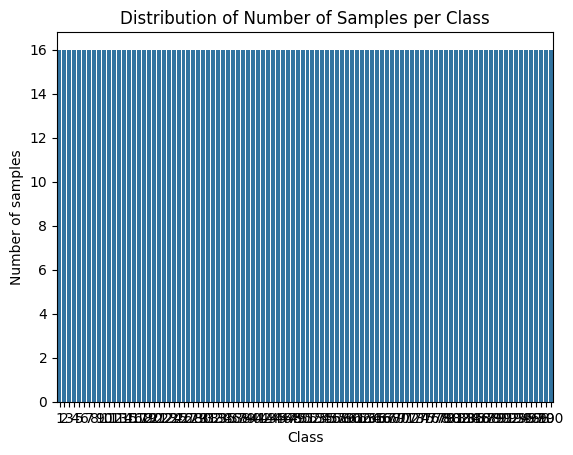

In [35]:
# Distribution plot of classes
import matplotlib.pyplot as plt
import seaborn as sns

# Count samples per class
class_counts = y.value_counts()

# Plot using barplot (Seaborn)
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Distribution of Number of Samples per Class")
plt.show()


**Part 2**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=42)


In [44]:
# Perform the training on each of the subsets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# Get all of the subsets from 10% to 100%

subset_sizes = np.linspace(0.1, 0.9, 9)
results = []

for size in subset_sizes:
  X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size = size, random_state = 42)

  # Decision tree
  dt = DecisionTreeClassifier()
  start_dt = time.time()
  dt.fit(X_sub, y_sub)
  dt_time = time.time() - start_dt
  dt_acc = accuracy_score(y_test, dt.predict(X_test))

  # Gradient boosting
  gb = GradientBoostingClassifier()
  start_gb = time.time()
  gb.fit(X_sub, y_sub)
  gb_time = time.time() - start_gb
  gb_acc = accuracy_score(y_test, gb.predict(X_test))

  # Store results
  results.append({
      'Subset %': int(size*100),
      'DT Accuracy': dt_acc,
      'DT Time (s)': dt_time,
      'GB Accuracy': gb_acc,
      'GB Time (s)': gb_time
  })

# Now perform everything again for the full dataset

# Decision tree
dt = DecisionTreeClassifier()
start_dt = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - start_dt
dt_acc = accuracy_score(y_test, dt.predict(X_test))

# Gradient boosting
gb = GradientBoostingClassifier()
start_gb = time.time()
gb.fit(X_train, y_train)
gb_time = time.time() - start_gb
gb_acc = accuracy_score(y_test, gb.predict(X_test))

# Store results
results.append({
    'Subset %': int(100),
    'DT Accuracy': dt_acc,
    'DT Time (s)': dt_time,
    'GB Accuracy': gb_acc,
    'GB Time (s)': gb_time
    })

In [46]:
df_results = pd.DataFrame(results)
print(df_results)

   Subset %  DT Accuracy  DT Time (s)  GB Accuracy  GB Time (s)
0        10     0.150000     0.028308     0.118750    24.376727
1        20     0.243750     0.060408     0.156250    59.125429
2        30     0.296875     0.090178     0.212500    98.819813
3        40     0.265625     0.103550     0.259375   133.575229
4        50     0.318750     0.126994     0.262500   169.487454
5        60     0.328125     0.155427     0.306250   206.701953
6        70     0.375000     0.178531     0.325000   238.615486
7        80     0.431250     0.209600     0.340625   269.991503
8        90     0.384375     0.233209     0.353125   300.080745
9       100     0.434375     0.259753     0.400000   328.476976


**Part 3**

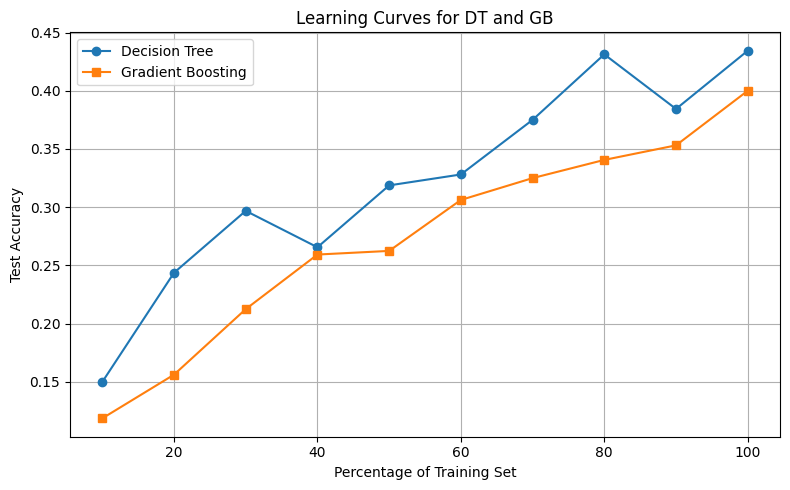

In [47]:
# Create the learning curve for the 2 classifiers

# Extract values from your dataframe
dt_accuracies = df_results['DT Accuracy']
gb_accuracies = df_results['GB Accuracy']
subset_percents = df_results['Subset %']


plt.figure(figsize=(8, 5))
plt.plot(subset_percents, dt_accuracies, marker='o', label='Decision Tree')
plt.plot(subset_percents, gb_accuracies, marker='s', label='Gradient Boosting')
plt.xlabel('Percentage of Training Set')
plt.ylabel('Test Accuracy')
plt.title('Learning Curves for DT and GB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Part 4**

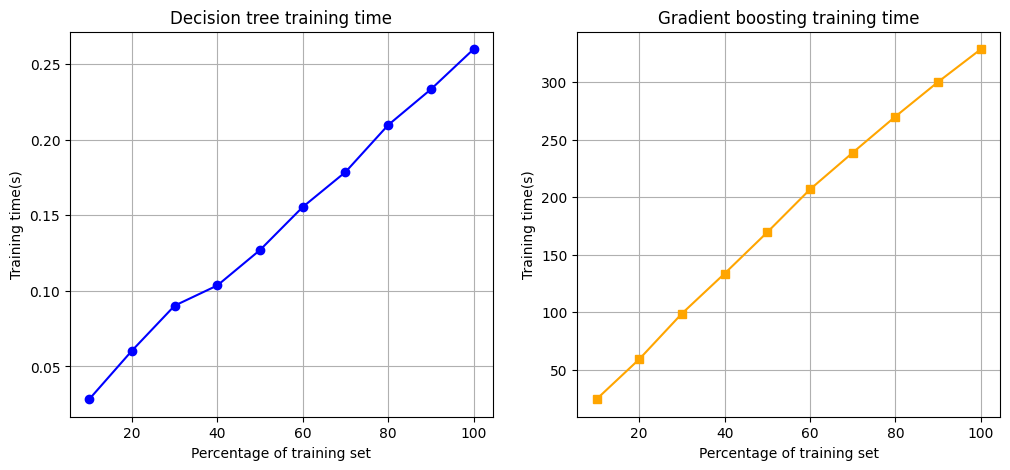

In [48]:
dt_times = df_results['DT Time (s)']
gb_times = df_results['GB Time (s)']

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Decision tree plot
ax1.plot(subset_percents, dt_times, marker = 'o', color = 'blue')
ax1.set_title("Decision tree training time")
ax1.set_xlabel("Percentage of training set")
ax1.set_ylabel("Training time(s)")
ax1.grid(True)

# Gradient boosting plot
ax2.plot(subset_percents, gb_times, marker = 's', color = 'orange')
ax2.set_title("Gradient boosting training time")
ax2.set_xlabel("Percentage of training set")
ax2.set_ylabel("Training time(s)")
ax2.grid(True)


**Part 5**

Study the scaling of training time and accuracy of classifiers with training data size using the two
figures generated in parts 3 and 4 of this problem. Compare the performance of classifiers in terms of
training time and accuracy and write 3 main observations. Which gives better accuracy? Which has a
shorter training time?

1. The decision tree takes significantly less training time than gradient boosting ( around 100 times faster) across all the percentages of the training set.

2. The decision tree has on average around 0.05 more accuract than the gradient boosting across all percentages of the training set

3. The training time for decision treee and gradient boosting training times are linealry dependent on the percentage of the training data or to be more precise on the amount of data